In [110]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import re



RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [111]:
import re
def cleanup(text):
    import string
    punctuation = '[\/!-.:?;,]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

In [112]:
data = pd.read_excel("Train_Test.xlsx")
data

,Manchete,Link,Fonte,Alert,Relevante
0,Google pede ajuda para projetos de software li...,https://www.google.com/url?rct=j&sa=t&url=http...,TecMundo,Parceria Publico Privada,0
1,UEMS/Mundo Novo tem projeto de R$674 mil aprov...,https://www.google.com/url?rct=j&sa=t&url=http...,UEMS,Parceria Publico Privada,1
2,Programa de Doria inclui privatizar Banco do B...,https://www.google.com/url?rct=j&sa=t&url=http...,O TEMPO,Parceria Publico Privada,0
3,"Projeto de parceiras do Estado, Tocantins PPI ...",https://www.google.com/url?rct=j&sa=t&url=http...,Conexão Tocantins,Parceria Publico Privada,1
4,Rênio Quintas: Em defesa do Cave - Correio Bra...,https://www.google.com/url?rct=j&sa=t&url=http...,Correio Braziliense,Parceria Publico Privada,1
...,...,...,...,...,...
1865,Programa De Condicoes E Meio Ambiente De Traba...,https://www.google.com/url?rct=j&sa=t&url=http...,PSEG - Engenharia de Segurança do Trabalho e ...,PPP,0
1866,MASTER MG - Segurança do Trabalho PGR- PCMSO P...,https://www.google.com/url?rct=j&sa=t&url=http...,Bendito Guia,PPP,0
1867,"Calçados | GDLP - Guadalupe : 42,5 and PPP",https://www.google.com/url?rct=j&sa=t&url=http...,Guadalupe Store,PPP,0
1868,Quais as modalidades na GA - Brainly.com.br,https://www.google.com/url?rct=j&sa=t&url=http...,Brainly,PPP,0


In [113]:
data = data[data["Manchete"].notna()]
data

,Manchete,Link,Fonte,Alert,Relevante
0,Google pede ajuda para projetos de software li...,https://www.google.com/url?rct=j&sa=t&url=http...,TecMundo,Parceria Publico Privada,0
1,UEMS/Mundo Novo tem projeto de R$674 mil aprov...,https://www.google.com/url?rct=j&sa=t&url=http...,UEMS,Parceria Publico Privada,1
2,Programa de Doria inclui privatizar Banco do B...,https://www.google.com/url?rct=j&sa=t&url=http...,O TEMPO,Parceria Publico Privada,0
3,"Projeto de parceiras do Estado, Tocantins PPI ...",https://www.google.com/url?rct=j&sa=t&url=http...,Conexão Tocantins,Parceria Publico Privada,1
4,Rênio Quintas: Em defesa do Cave - Correio Bra...,https://www.google.com/url?rct=j&sa=t&url=http...,Correio Braziliense,Parceria Publico Privada,1
...,...,...,...,...,...
1865,Programa De Condicoes E Meio Ambiente De Traba...,https://www.google.com/url?rct=j&sa=t&url=http...,PSEG - Engenharia de Segurança do Trabalho e ...,PPP,0
1866,MASTER MG - Segurança do Trabalho PGR- PCMSO P...,https://www.google.com/url?rct=j&sa=t&url=http...,Bendito Guia,PPP,0
1867,"Calçados | GDLP - Guadalupe : 42,5 and PPP",https://www.google.com/url?rct=j&sa=t&url=http...,Guadalupe Store,PPP,0
1868,Quais as modalidades na GA - Brainly.com.br,https://www.google.com/url?rct=j&sa=t&url=http...,Brainly,PPP,0


In [114]:
textos = list(data["Manchete"])

for e in range(len(textos)):
    textos[e] = " ".join(re.findall(r"[^\s\d,.!?:]+", textos[e])) 

y = list(data['Relevante'])


## Document Frequency

Para ver se tem palavras que podem ser utilizadas com stopwords

In [115]:
X_lista = [s for s in data['Manchete']]
DF_vectorizer = CountVectorizer(binary=True)
X_unigram_comments = DF_vectorizer.fit_transform(X_lista)

X_unigram_comments = np.mean(X_unigram_comments, axis=0)

X_unigram_comments = [ (X_unigram_comments[0,DF_vectorizer.vocabulary_[i]], i) for i in DF_vectorizer.vocabulary_.keys() ]

tuplas_ordenadas = sorted(X_unigram_comments, reverse=True) # reverse=True pede uma ordenação em ordem decrescente

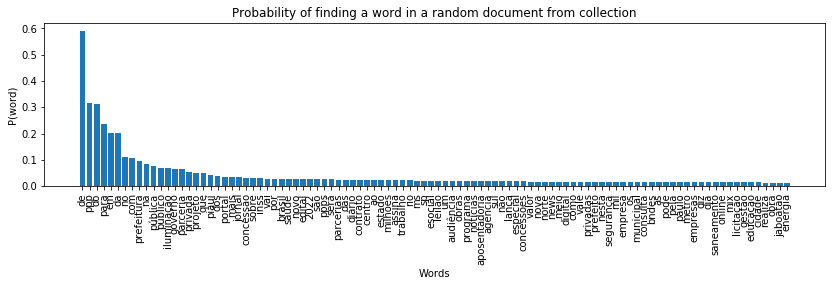

In [116]:
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]
eixo_x = np.arange(len(palavras))
n_palavras = 100
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.ylabel('P(word)')
plt.xlabel('Words')
plt.title('Probability of finding a word in a random document from collection')
plt.show()

In [117]:
stopwords = ['de', 'a', 'o', 'com', 'do', 'da', 'que', 'um', 'uma', 'os', 'no', 'se', 'na', 'por', 'as', 'dos', 'ao', 'das',  'ou', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está']

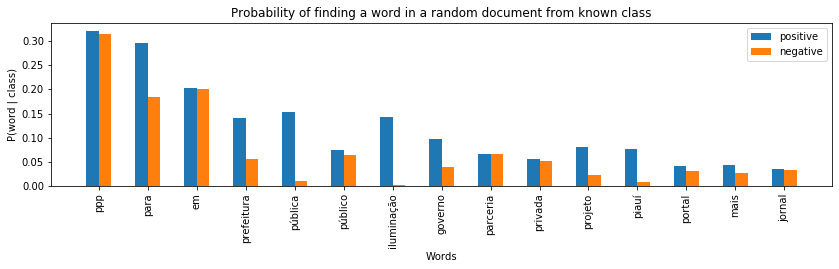

In [118]:
textos = [s for s in data['Manchete']]
vectorizer = CountVectorizer(stop_words = stopwords, binary=True)
x = vectorizer.fit_transform(textos).todense()
x_ = np.mean(x, axis=0)

# Passo 2: escolher somente elementos correspondentes a cada categoria
filtro_pos = data['Relevante']==1

x_pos = x[filtro_pos,:] # Escolho linhas com sentimento positivo
x_pos_ = np.mean(x_pos, axis=0)
filtro_neg = data['Relevante']==0
x_neg = x[filtro_neg,:] # Escolho linhas com sentimento negativo
x_neg_ = np.mean(x_neg, axis=0)

# Passo 3: ordenar palavras de acordo com a soma geral. Vou incluir tambem a contagem nos grupos positivo e negativo!
tuplas = [ (\
            x_[0,vectorizer.vocabulary_[i]],\
            i,\
            x_pos_[0, vectorizer.vocabulary_[i]],\
            x_neg_[0, vectorizer.vocabulary_[i]]\
            ) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens_pos = [ t[2] for t in tuplas_ordenadas ]
contagens_neg = [ t[3] for t in tuplas_ordenadas ]


eixo_x = np.arange(len(palavras))
n_palavras = 15

plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras]-0.125, contagens_pos[0:n_palavras], width=0.25, label='positive')
plt.bar(eixo_x[0:n_palavras]+0.125, contagens_neg[0:n_palavras],  width=0.25, label='negative')
plt.legend()
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.ylabel('P(word | class)')
plt.xlabel('Words')
plt.title('Probability of finding a word in a random document from known class')
plt.show()

In [119]:
vectorizer = CountVectorizer(binary=True, stop_words=stopwords)
X = vectorizer.fit_transform(textos) 

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)

In [121]:
# Modelo
#BernoulliNB = BernoulliNB()
MultinomialNB = MultinomialNB()

In [122]:
# Treinar modelo

MultinomialNB.fit(X_train, y_train)

MultinomialNB()

In [123]:
# Validação Cruzada

from sklearn.model_selection import cross_val_score


res_NB = cross_val_score(
    MultinomialNB, #modelo
    X_train,
    y_train,
    cv=4, #partições
    scoring="accuracy", #numero de acertos por numero total
    n_jobs=-1, # use todos os cores da minha maquina, faça tudo em paralelo
)

print(res_NB)
print(f'Acurácia média:{res_NB.mean()}')

[0.83067093 0.83067093 0.80769231 0.81410256]
Acurácia média:0.8207841812075038


In [124]:
vocab = vectorizer.vocabulary_
# Probabilidades
palavras_true = []
palavras_false = []
for t in vocab.keys():
    prob_true = MultinomialNB.feature_log_prob_[0, vocab[t]]
    palavras_true.append( (prob_true, t) ) 
    prob_false = MultinomialNB.feature_log_prob_[1, vocab[t]]
    palavras_false.append( (prob_false, t) )

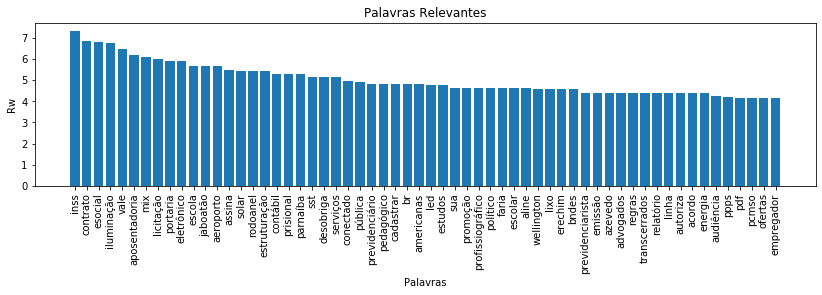

In [125]:
import math
import numpy as np
rw=[]
for i in range(len(palavras_false)):
    r = 2*abs((palavras_false[i][0])-(palavras_true[i][0]))
    rw.append((r, palavras_false[i][1]))


rw_ordenado =  sorted(rw, reverse=True)

palavras = [ t[1] for t in rw_ordenado ]
contagens = [ t[0] for t in rw_ordenado ]
eixo_x = np.arange(len(palavras))
n_palavras = 60
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.ylabel('Rw')
plt.xlabel('Palavras')
plt.title('Palavras Relevantes')
plt.show()

In [126]:
for tupla in rw_ordenado[:15]:
    for p in tuplas_ordenadas: #(freq, palavra, qtd de vezes que aparece em manchetes positiva, qtd de vezes que aparece em manchetes negativa)
        if tupla[1]==p[1]:
            if p[2] >p[3]:
                print(f'{p[1]} - TRUE')
            else:
                print(f'{p[1]} - FALSE')

inss - FALSE
contrato - TRUE
esocial - FALSE
iluminação - TRUE
vale - FALSE
aposentadoria - FALSE
mix - FALSE
licitação - TRUE
portaria - FALSE
eletrônico - FALSE
escola - FALSE
jaboatão - TRUE
aeroporto - TRUE
assina - TRUE
solar - TRUE


In [127]:
lista_analisando = ['ppp', 'público', 'prefeitura', 'parceria', 'parcerias', 'ms', 'projetos']

In [128]:
for tupla in rw_ordenado:
    for p in tuplas_ordenadas:
        if p[1] in lista_analisando:
            if tupla[1]==p[1]: 
                if p[2] >p[3]:
                    print(f'{p[1]} - TRUE')
                else:
                    print(f'{p[1]} - FALSE')

ms - TRUE
prefeitura - TRUE
parcerias - FALSE
ppp - TRUE
público - TRUE
parceria - TRUE
projetos - TRUE


In [129]:
sw_com_relevantes_MNB = stopwords
#for t in rw_ordenado[1500:]:
for t in rw_ordenado[1450:]:
    if t[1] not in sw_com_relevantes_MNB:
        sw_com_relevantes_MNB.append(t[1])
        
# juntando as palavras do analisando
#sw_com_relevantes_MNB.append('ppp')
#sw_com_relevantes_MNB.append('público')
#sw_com_relevantes_MNB.append('parceria')
#sw_com_relevantes_MNB.append('parcerias')
#sw_com_relevantes_MNB.append('projetos')


vectorizer_relevantes_MNB = CountVectorizer(binary=True, stop_words=sw_com_relevantes_MNB)
X_relevantes = vectorizer_relevantes_MNB.fit_transform(textos) 

In [130]:
print(sw_com_relevantes_MNB)

['de', 'a', 'o', 'com', 'do', 'da', 'que', 'um', 'uma', 'os', 'no', 'se', 'na', 'por', 'as', 'dos', 'ao', 'das', 'ou', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'oswaldo', 'ortocane', 'original', 'origem', 'organizar', 'ordenamento', 'ordem', 'opportunity', 'opositor', 'opinião', 'onde', 'olímpico', 'ollie', 'oliveira', 'olimpíadas', 'oitivas', 'oi', 'oftalmológica', 'oficinas', 'oficina', 'oficiais', 'oferecem', 'oferece', 'obrigatorio', 'objetivos', 'objetiva', 'obemdito',

In [131]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_relevantes, y, test_size=0.33, random_state=RANDOM_SEED)

In [132]:
MultinomialNB.fit(X_train_r, y_train_r)

MultinomialNB()

In [133]:
res_NB_r = cross_val_score(
    MultinomialNB, #modelo
    X_train_r,
    y_train_r,
    cv=10, #partições
    scoring="accuracy", #numero de acertos por numero total
    n_jobs=-1, # use todos os cores da minha maquina, faça tudo em paralelo
)

print(res_NB_r)
print(f'Acurácia média:{res_NB_r.mean()}')

[0.944 0.864 0.92  0.912 0.872 0.856 0.872 0.912 0.848 0.88 ]
Acurácia média:0.8879999999999999


In [134]:
from sklearn.metrics import confusion_matrix

y_train_pred = MultinomialNB.predict(X_train_r)
mat = confusion_matrix(y_train_r, y_train_pred)
mat

array([[600,  56],
       [ 11, 583]], dtype=int64)

In [1]:
600+56+11+583

1250

In [135]:
print(f'{mat[0][1]} são classificados relevante e na verdade não são')
print(f'{mat[1][0]} são classificados com não relevantes, mas na verdade são')

56 são classificados relevante e na verdade não são
11 são classificados com não relevantes, mas na verdade são


In [136]:
y_pred_MBN = MultinomialNB.predict(X_test_r)

In [137]:
acc = accuracy_score(y_test_r, y_pred_MBN)

print("Acurácia: {}".format(acc))

Acurácia: 0.839546191247974


In [138]:
mat = confusion_matrix(y_test_r, y_pred_MBN)
mat

array([[241,  78],
       [ 21, 277]], dtype=int64)

In [139]:
print(f'{mat[0][1]} são classificados relevante e na verdade não são')
print(f'{mat[1][0]} são classificados com não relevantes, mas na verdade são')

78 são classificados relevante e na verdade não são
21 são classificados com não relevantes, mas na verdade são


In [108]:
(21/len(y_pred_MBN))*100

3.403565640194489

In [109]:
(78/len(y_pred_MBN))*100

12.641815235008103

## Bernoulli Nave Baeys

In [32]:
# Modelo
BernoulliNB = BernoulliNB()
BernoulliNB.fit(X_train, y_train)

BernoulliNB()

In [33]:
# Validação Cruzada

from sklearn.model_selection import cross_val_score


res_NB = cross_val_score(
    BernoulliNB, #modelo
    X_train,
    y_train,
    cv=4, #partições
    scoring="accuracy", #numero de acertos por numero total
    n_jobs=-1, # use todos os cores da minha maquina, faça tudo em paralelo
)

print(res_NB)
print(f'Acurácia média:{res_NB.mean()}')

[0.87539936 0.84664537 0.81089744 0.82692308]
Acurácia média:0.8399663103137545


In [34]:
vocab = vectorizer.vocabulary_
# Probabilidades
palavras_true = []
palavras_false = []
for t in vocab.keys():
    prob_true = BernoulliNB.feature_log_prob_[0, vocab[t]]
    palavras_true.append( (prob_true, t) )
    prob_false = BernoulliNB.feature_log_prob_[1, vocab[t]]
    palavras_false.append( (prob_false, t) )

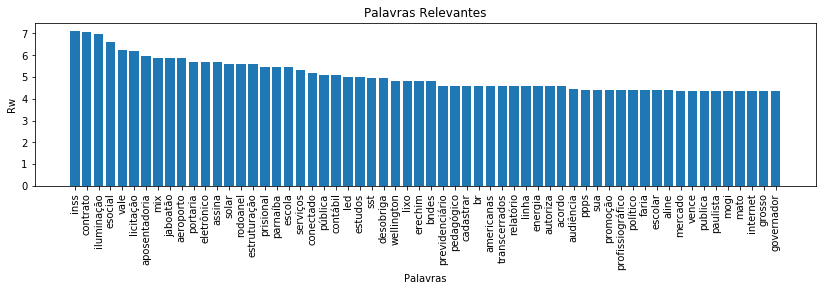

In [35]:
import math
import numpy as np
rw=[]
for i in range(len(palavras_false)):
    r = 2*abs((palavras_false[i][0])-(palavras_true[i][0]))
    rw.append((r, palavras_false[i][1]))


rw_ordenado =  sorted(rw, reverse=True)

palavras = [ t[1] for t in rw_ordenado ]
contagens = [ t[0] for t in rw_ordenado ]
eixo_x = np.arange(len(palavras))
n_palavras = 60
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.ylabel('Rw')
plt.xlabel('Palavras')
plt.title('Palavras Relevantes')
plt.show()

In [36]:
for tupla in rw_ordenado[:15]:
    for p in tuplas_ordenadas:
        if tupla[1]==p[1]:
            if p[2] >p[3]:
                print(f'{p[1]} - TRUE')
            else:
                print(f'{p[1]} - FALSE')

inss - FALSE
contrato - TRUE
iluminação - TRUE
esocial - FALSE
vale - FALSE
licitação - TRUE
aposentadoria - FALSE
mix - FALSE
jaboatão - TRUE
aeroporto - TRUE
portaria - FALSE
eletrônico - FALSE
assina - TRUE
solar - TRUE
rodoanel - TRUE


In [37]:
stopwords = ['de', 'a', 'o', 'com', 'do', 'da', 'que', 'um', 'uma', 'os', 'no', 'se', 'na', 'por', 'as', 'dos', 'ao', 'das',  'ou', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está']
sw_com_relevantes = stopwords
for t in rw_ordenado[650:]:
    if t[1] not in sw_com_relevantes:
        sw_com_relevantes.append(t[1])
        
# juntando as palavras do analisando
#sw_com_relevantes_MNB.append('ppp')
#sw_com_relevantes_MNB.append('público')
#sw_com_relevantes_MNB.append('parceria')
#sw_com_relevantes_MNB.append('parcerias')
#sw_com_relevantes_MNB.append('projetos')
        

vectorizer_relevantes = CountVectorizer(binary=True, stop_words=sw_com_relevantes)
X_relevantes = vectorizer_relevantes.fit_transform(textos) 

In [38]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_relevantes, y, test_size=0.33, random_state=RANDOM_SEED)

In [39]:
BernoulliNB = BernoulliNB.fit(X_train_r, y_train_r)

In [40]:
res_NB_r = cross_val_score(
    BernoulliNB, #modelo
    X_train_r,
    y_train_r,
    cv=10, #partições
    scoring="accuracy", #numero de acertos por numero total
    n_jobs=-1, # use todos os cores da minha maquina, faça tudo em paralelo
)

print(res_NB_r)
print(f'Acurácia média:{res_NB_r.mean()}')

[0.92  0.888 0.952 0.944 0.896 0.88  0.888 0.824 0.888 0.896]
Acurácia média:0.8976000000000001


In [41]:
from sklearn.metrics import confusion_matrix


y_train_pred = BernoulliNB.predict(X_train_r)
mat = confusion_matrix(y_train_r, y_train_pred)
mat

array([[635,  21],
       [ 72, 522]], dtype=int64)

In [42]:
y_pred_BN = BernoulliNB.predict(X_test_r)

acc = accuracy_score(y_test_r, y_pred_BN)

print("Acurácia: {}".format(acc))

Acurácia: 0.8346839546191248


In [43]:
import statistics
import itertools
y_pred = list(itertools.repeat(0, len(y_pred_BN)))
for i in range(len(y_pred_BN)-1):
    valores = [y_pred_BN[i], y_pred_MBN[i]]
    
    
    try:
        y_pred[i] = statistics.mode(valores)
    except:
        y_pred[i] = 1
    
# Calcula acurácia.
acc = accuracy_score(y_test, y_pred)

print("Acurácia: {}".format(acc))
    

Acurácia: 0.8379254457050244


## Classificando Base

In [44]:
# Preparando:
df = pd.read_excel("Manchetes_Novas.xlsx")
df

textos_classificar = list(df["Manchete"])

for e in range(len(textos)):
    textos[e] = " ".join(re.findall(r"[^\s\d,.!?:]+", textos[e]))
    
#vectorizer= CountVectorizer(binary=True, stop_words=sw_com_relevantes_MNB)
X_classificar = vectorizer_relevantes_MNB.transform(textos_classificar) 

Classificacao = MultinomialNB.predict(X_classificar)

df["Relevância"] = pd.Series(Classificacao)

df.to_excel('BASE_CLASSIFICADA.xlsx', index = False)

